## <center> Titanic - Data Preprocessing and Visualization </center>

---

### Import libraries

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.ensemble import *

### Path to the dataset

In [7]:
#PATH = '../input/'

### Load data

In [8]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

### Train data

In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Test data

In [10]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## <center> Visualize and preprocess train data </center>

### Describe data

In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Columns

In [12]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data type of each column

In [13]:
#train_data['Survived']=train_data['Survived'].astype(int)

In [14]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train_data['Embarked'].isnull().sum()

2

### Number of missing values

In [16]:
column_names = train_data.columns
for column in column_names:
    print(column + ' - ' + str(train_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


- The columns 'Age' and 'Cabin' contains more null values.

### Insights
- 'Survived' is the target column/variable.
- 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
- 'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques.
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values. 
- We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

### Visualization of 'Survived' (Target column)
- As we know, majority of passengers couldn't survive.
- Data is imbalanced.

In [17]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

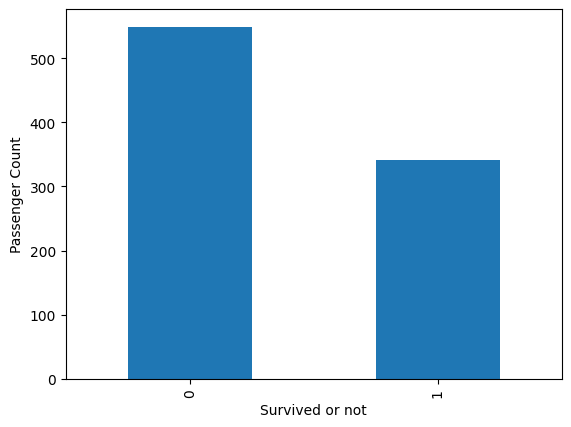

In [18]:
plt = train_data.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

### Pclass
- Majority of them are from 3rd class.

Text(0, 0.5, 'Survival Probability')

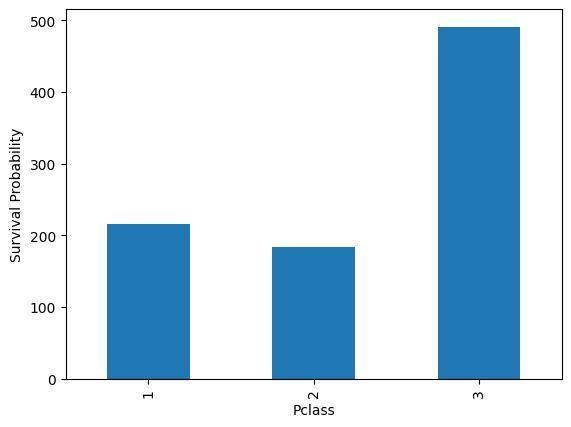

In [19]:
plt = train_data.Pclass.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [20]:
train_data[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [21]:
train_data[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


### Pclass - Survival probability

Text(0, 0.5, 'Survival Probability')

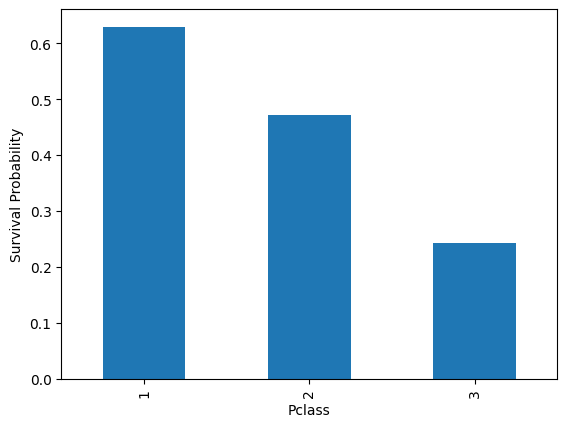

In [22]:
plt = train_data[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

- From the above results, we can say that, 1st class has high chance of surviving than the other two classes.

### Sex
- Majority of them are Male.

Text(0, 0.5, 'Passenger count')

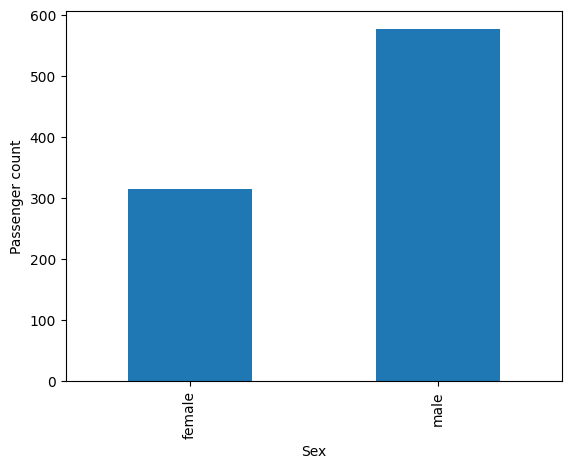

In [23]:
plt = train_data.Sex.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

### Sex - Survival probability
- As we see, the survival probaility for Female is more. They might have given more priority to female than male.

Text(0, 0.5, 'Survival Probability')

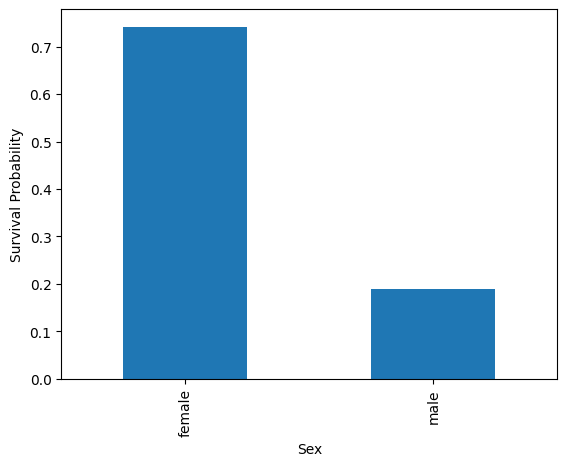

In [24]:
plt = train_data[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

### Embarked
- Most of them are from Southampton(S).

Text(0, 0.5, 'Passenger count')

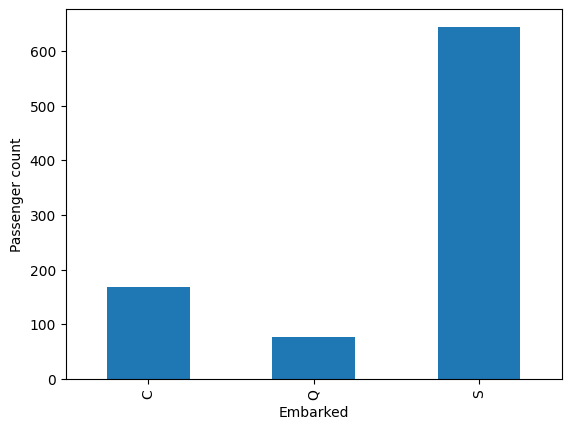

In [25]:
plt = train_data.Embarked.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

### Embarked - Survival probability
- Survival probability: C > Q > S

Text(0, 0.5, 'Survival Probability')

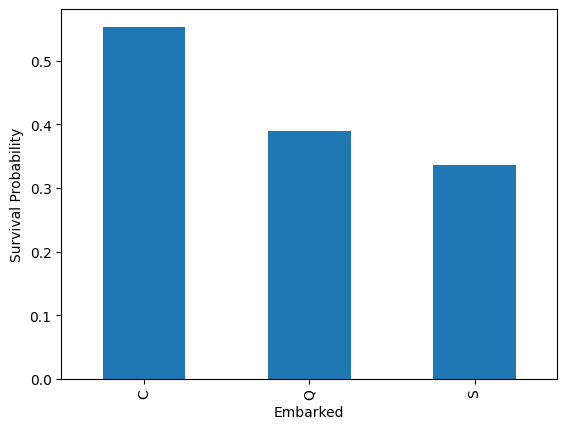

In [26]:
plt = train_data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

### SibSp - Siblings/Spouse

Text(0, 0.5, 'Passenger count')

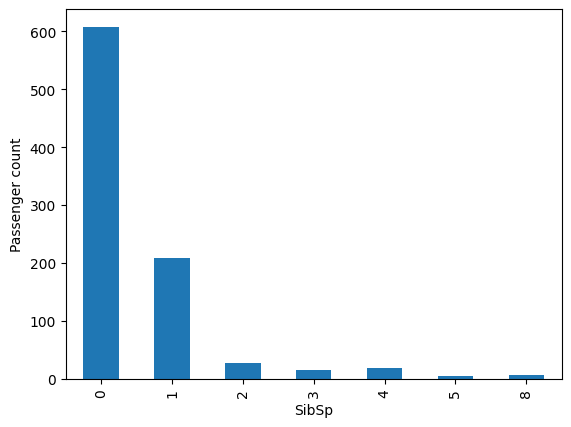

In [27]:
plt = train_data.SibSp.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

- As we can see, majority of them have no Siblings/Spouse.

Text(0, 0.5, 'Survival Probability')

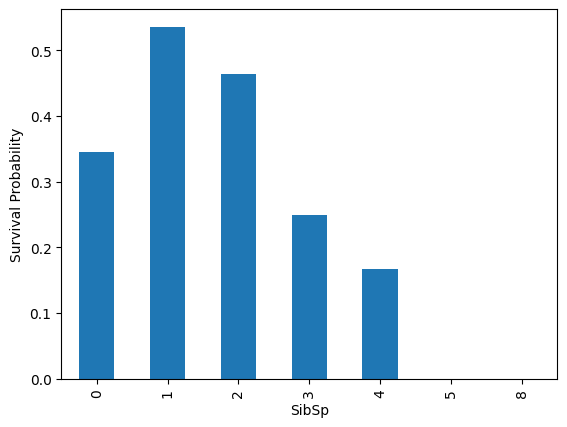

In [28]:
plt = train_data[['SibSp', 'Survived']].groupby('SibSp').mean().Survived.plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

- The passengers having one sibling/spouse has more survival probability.
- '1' > '2' > '0' > '3' > '4'

### Parch - Children/Parents

Text(0, 0.5, 'Passenger count')

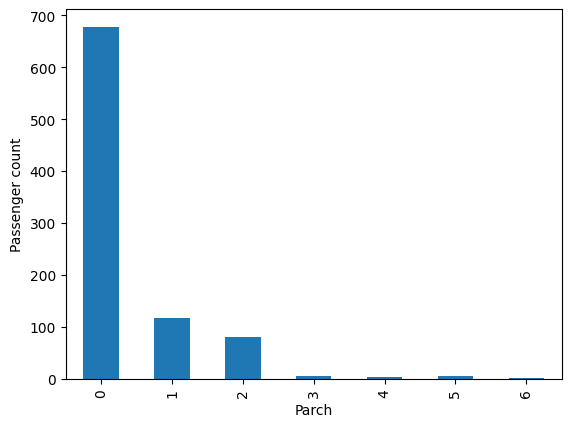

In [29]:
plt = train_data.Parch.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

- As we can see, majority of them have no Children/Parents.

Text(0, 0.5, 'Survival Probability')

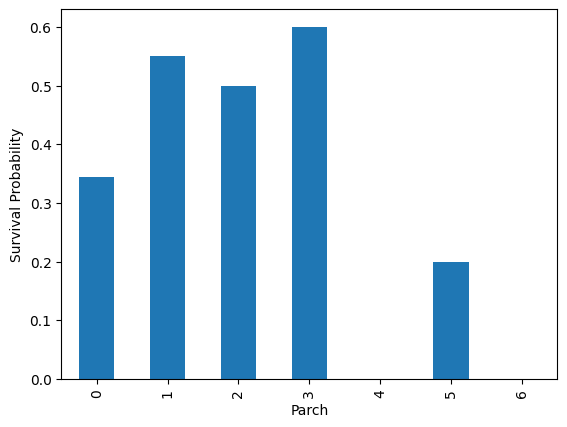

In [30]:
plt = train_data[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

- The passengers having three children/parents has more survival probability.
- '3' > '1' > '2' > '0' > '5'

### Embarked vs Pclass

In [31]:
!pip install seaborn==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


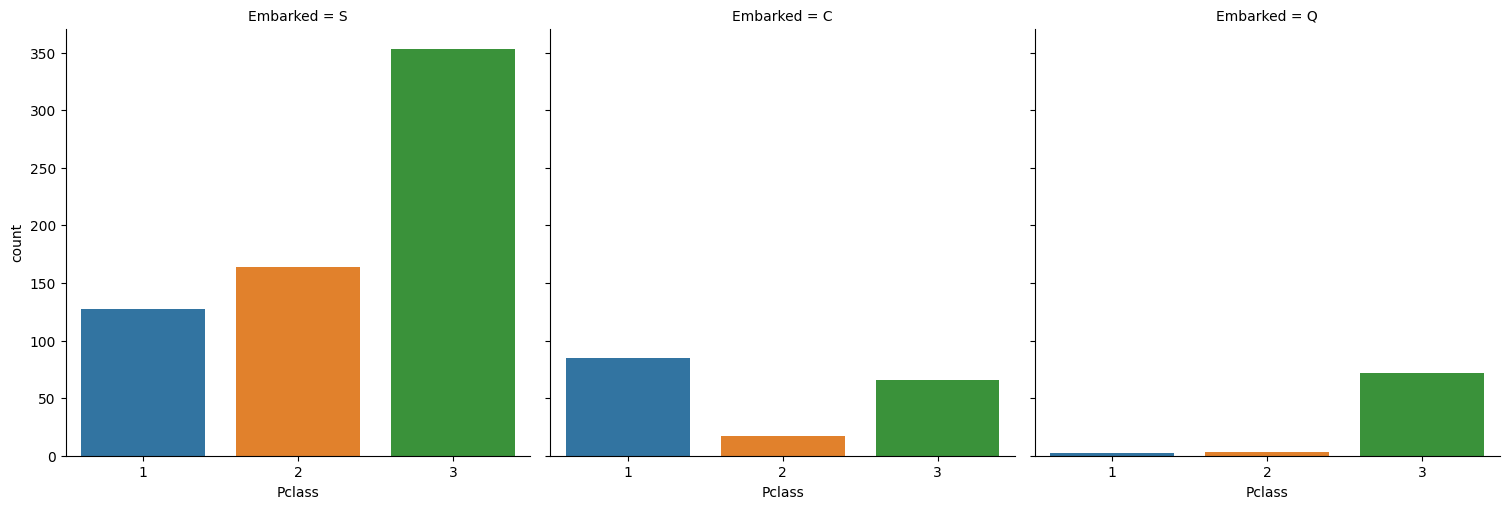

In [33]:
sns.factorplot('Pclass', col = 'Embarked', data = train_data, kind = 'count')

### Pclass vs Sex
- Majority of the passengers are Male in every class. But, the survival probability for female is high.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


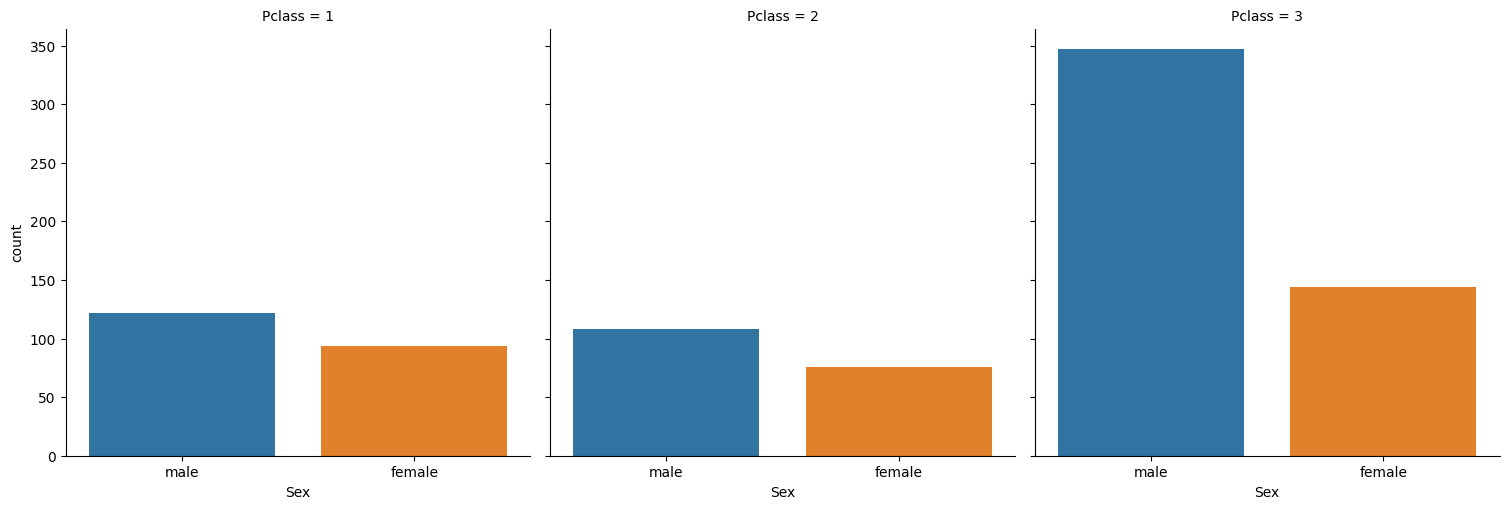

In [34]:
sns.factorplot('Sex', col = 'Pclass', data = train_data, kind = 'count')

### Embarked vs Sex

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


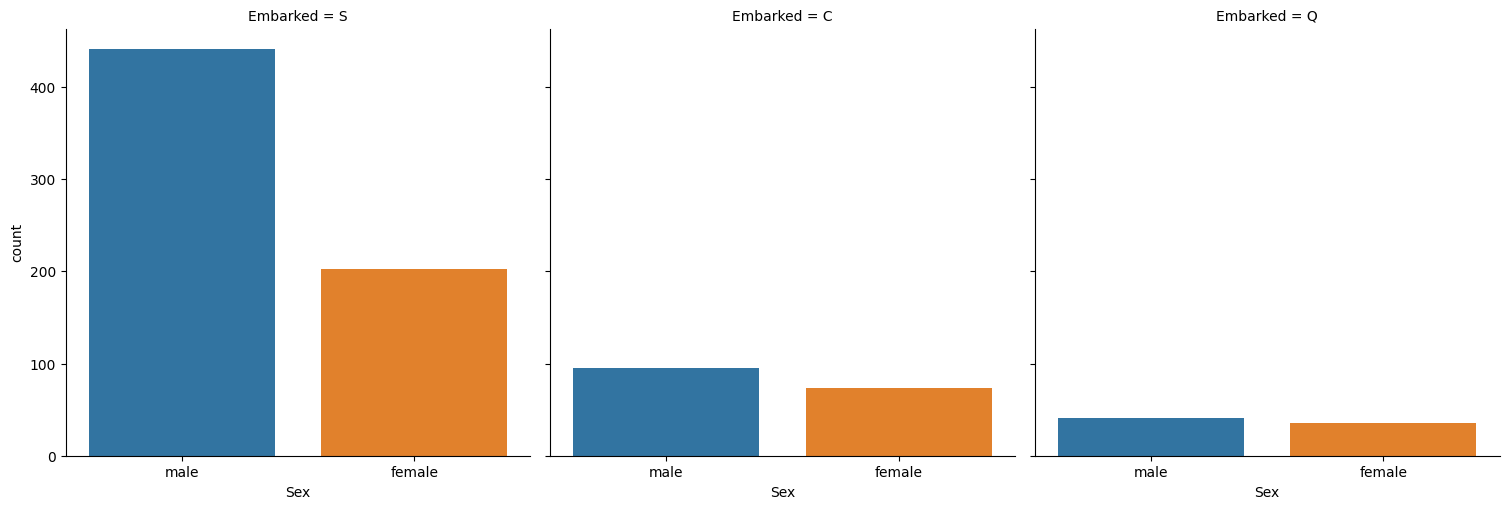

In [35]:
sns.factorplot('Sex', col = 'Embarked', data = train_data, kind = 'count')

### Create a new feature 'Family size' from the features 'SibSp' and 'Parch'

In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [38]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Remove unnecessary columns
- We can remove 'Ticket' and 'PassengerId', as they don't contribute to target class.
- Remove 'Cabin' as it has a lot of missing values in both train and test data

In [39]:
train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [40]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


### Map 'Sex' and 'Embarked' to numerical values.

In [41]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [42]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


### Preprocess 'Name'
- Extarct title from name of the passenger and categorize them.
- Drop the column 'Name'

In [43]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data = train_data.drop(columns='Name')

In [44]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,1,38.0,1,0,71.2833,0.0,2,Mrs
2,1,3,1,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,1,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,0,35.0,0,0,8.0500,2.0,1,Mr


<Axes: >

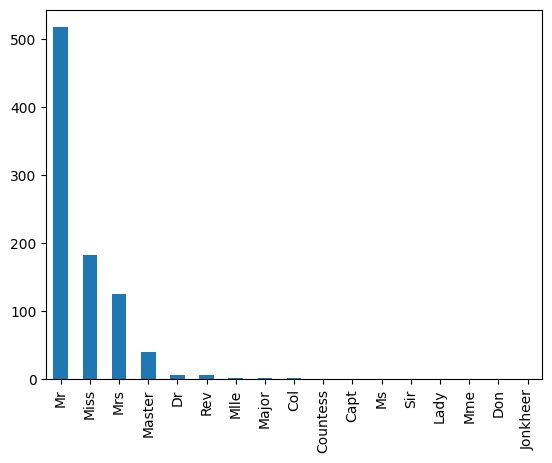

In [46]:
train_data.Title.value_counts().plot(kind='bar')

- Combine some of the classes and group all the rare classes into 'Others'.

In [47]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

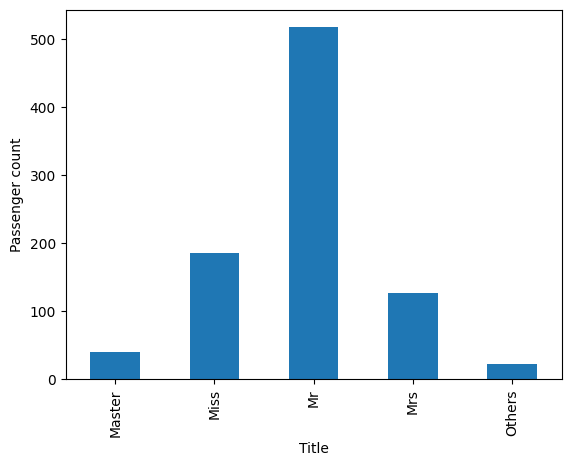

In [48]:
plt = train_data.Title.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

- The passengers with title 'Mr' are more.

Text(0, 0.5, 'Survival Probability')

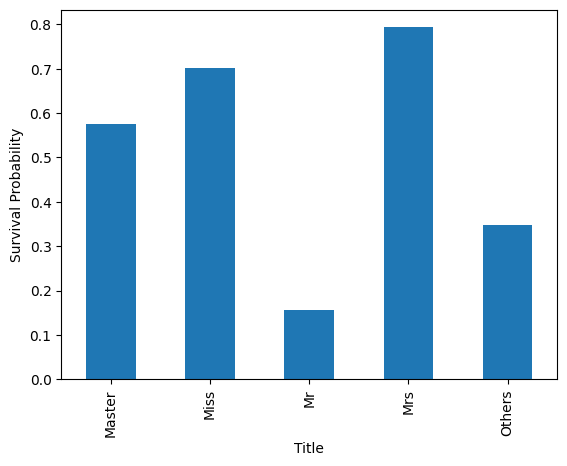

In [49]:
plt = train_data[['Title', 'Survived']].groupby('Title').mean().Survived.plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

- The survival probability for 'Mrs' and 'Miss' is high comapred to other classes.

### Map 'Title' to numerical values

In [50]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [51]:
train_data['Title'] = train_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [52]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


### Correlation between columns

In [53]:
train_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
Title           0
dtype: int64

In [54]:
train_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
Title           0
dtype: int64

In [55]:
train_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
Title           0
dtype: int64

In [56]:
train_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
Title           0
dtype: int64

### Impute 'Embarked' with it's majority class.

In [57]:
train_data['Embarked'].isnull().sum()

2

- There are two null values in the column 'Embarked'. Let's impute them using majority class.
- The majority class is 'S'. Impute the unkonown values (NaN) using 'S'

In [58]:
train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


### Missing values - 'Age'
- Let's find the columns that are useful to predict the value of Age.

In [59]:
corr_matrix = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

- Age is not correlated with 'Sex' and 'Fare'. So, we don't consider these two columns while imputing 'Sex'.
- 'Pclass', 'SibSp' and 'Parch' are negatively correlated with 'Sex'.
- Let's fill Age with the median age of similar rows from 'Pclass', 'SibSp' and 'Parch'. If there are no similar rows, fill the age with the median age of total dataset.

In [72]:
NaN_indexes = train_data['Age'][train_data['Age'].isnull()].index

In [73]:
for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == train_data.iloc[i]["SibSp"]) & (train_data.Parch == train_data.iloc[i]["Parch"]) & (train_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        train_data['Age'].iloc[i] = pred_age
    else:
        train_data['Age'].iloc[i] = train_data['Age'].median()

<ipython-input-73-d2dfe63a8447>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = pred_age
<ipython-input-73-d2dfe63a8447>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = pred_age
<ipython-input-73-d2dfe63a8447>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = pred_age
<ipython-input-73-d2dfe63a8447>:4: SettingWithCopyWarning: 
A value is trying to be s

In [74]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

- There are no missing values in the data.

In [75]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2
